### **Topic based Analysis**
The code for Topic Analysis

In [1]:
from google.colab import drive
import os
from os import listdir
from os.path import isfile, join

drive.mount("/content/gdrive")
os.chdir("/content/gdrive/My Drive/FJ")


Mounted at /content/gdrive


In [2]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd

papers = pd.read_excel('Article_info_Rq1.xlsx')

print(papers['Combine_Abstract'])


0      Sapientia: a Smart Campus model to promote dev...
1      Human Work Interaction Design of the Smart Uni...
2      Smart Lecture Room for Smart Campus Building A...
3      Green and digital entrepreneurship in smart ci...
4      Smart Campus Innovation Lab Multidisciplinary ...
                             ...                        
185    I-Campus: Towards The Information Integration ...
186    Smart University - The Next Step Towards the K...
187    Study of Smart Campus Development Using Intern...
188    Design of smart campus management system based...
189    Smart university, a new concept in the Interne...
Name: Combine_Abstract, Length: 190, dtype: object


In [4]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = ""
papers['Combine_Abstract']=papers['Combine_Abstract'].map(lambda x: re.sub("[,\.!?]", "", str(x)))
# Convert the titles to lowercase
papers['Combine_Abstract']=papers['Combine_Abstract'].map(lambda x: str(x).lower())
# Print out the first rows of papers
papers['Combine_Abstract']

0      sapientia: a smart campus model to promote dev...
1      human work interaction design of the smart uni...
2      smart lecture room for smart campus building a...
3      green and digital entrepreneurship in smart ci...
4      smart campus innovation lab multidisciplinary ...
                             ...                        
185    i-campus: towards the information integration ...
186    smart university - the next step towards the k...
187    study of smart campus development using intern...
188    design of smart campus management system based...
189    smart university a new concept in the internet...
Name: Combine_Abstract, Length: 190, dtype: object

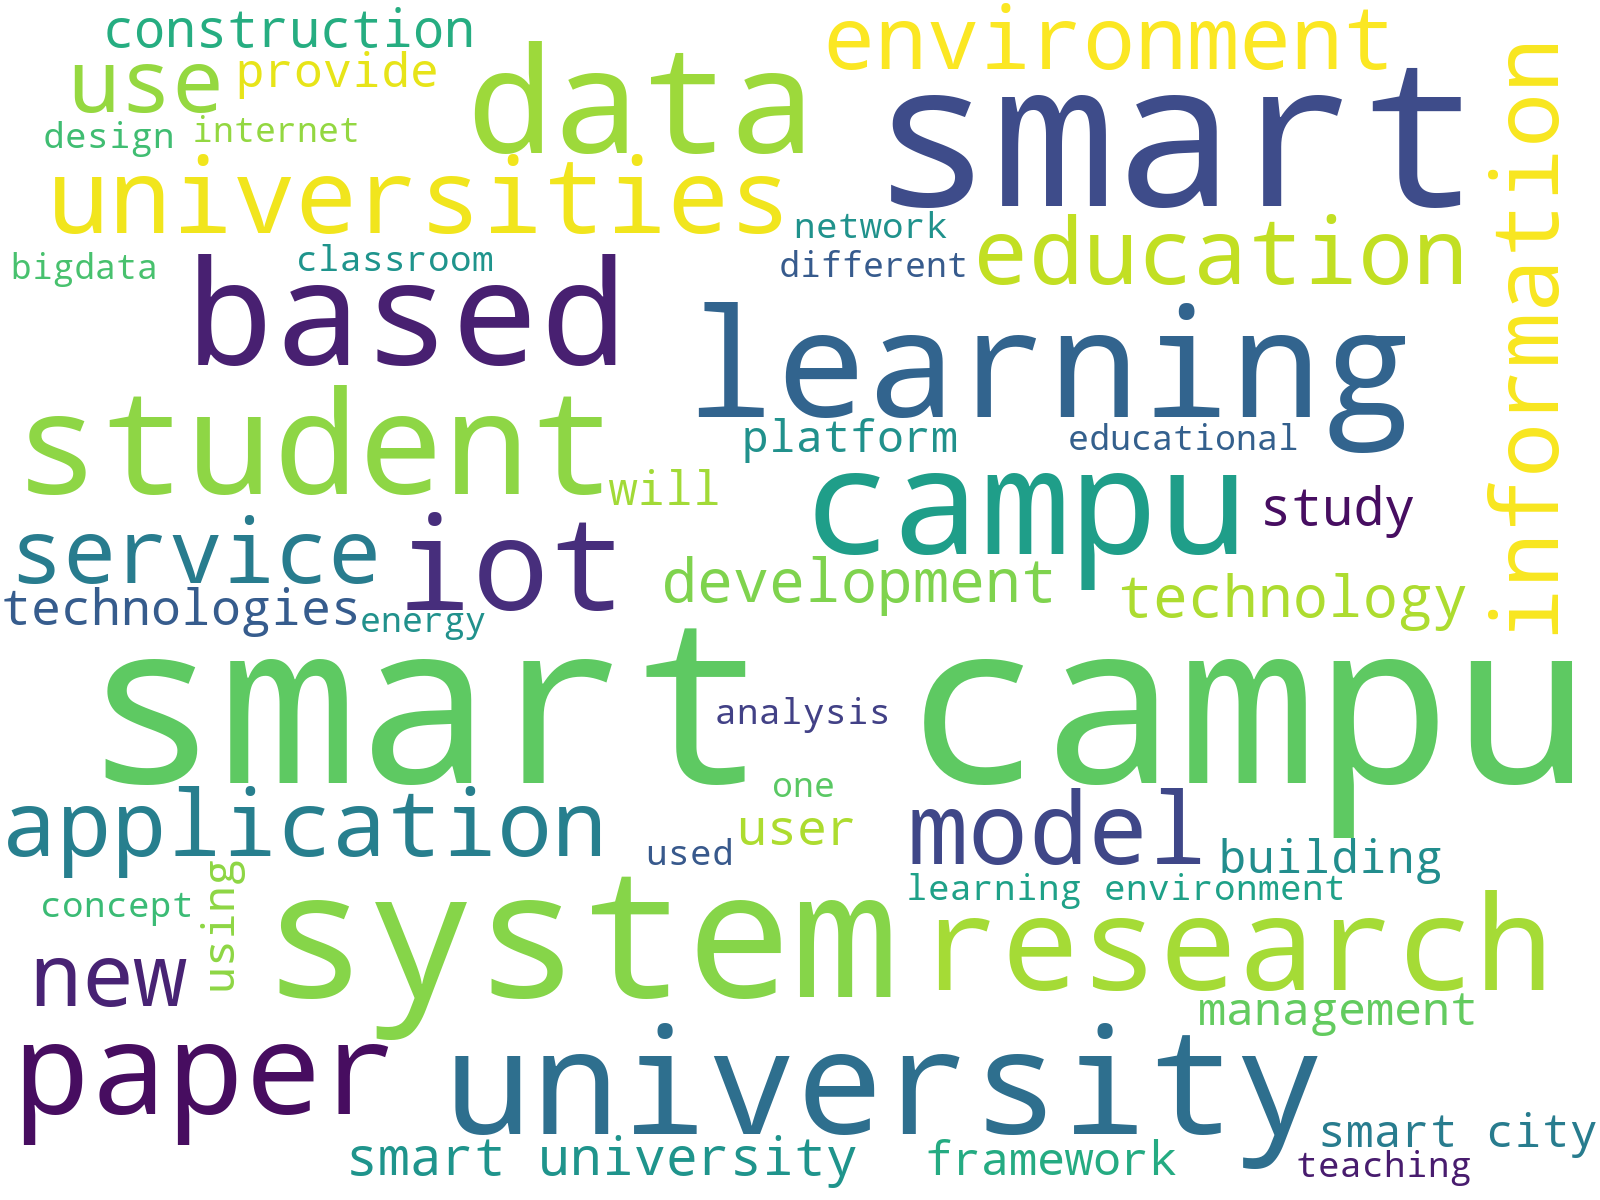

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['Combine_Abstract'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue',width=1600, height=1200)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [6]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.corpus import stopwords
doc=long_string
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'smart','campus','datum','article','use', 'new','one','paper','also','made','ever','using','pv','could','particularly','canada','spent','eight','regina','saskatchewan','suggest','pv','june','july','august','found','eg','suggests','thus','however','makes','bayes','naive','among','ie','via','pa','uk','whether',])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.Combine_Abstract.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words)


[['sapientia', 'model', 'promote', 'device', 'application', 'flexibility', 'expansion', 'internet', 'things', 'information', 'communication', 'technology', 'allows', 'application', 'intelligent', 'concepts', 'university', 'spaces', 'several', 'models', 'implemented', 'recently', 'solutions', 'foster', 'flexibility', 'incorporation', 'hardware', 'software', 'solutions', 'existing', 'infrastructure', 'still', 'gap', 'motivating', 'research', 'sapientia', 'model', 'promotes', 'flexibility', 'facilitating', 'incorporation', 'solutions', 'existing', 'infrastructure', 'model', 'architecture', 'composed', 'layers', 'facilitate', 'technology', 'management', 'update', 'university', 'received', 'model', 'implementation', 'allowing', 'execution', 'experiments', 'evaluate', 'incorporation', 'hardware', 'applications', 'included', 'mobile', 'application', 'support', 'user', 'orientation', 'internal', 'applications', 'collect', 'process', 'information', 'temperature', 'experiments', 'show', 'model',

In [8]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus)

[[(0, 1), (1, 1), (2, 4), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 3), (18, 1), (19, 2), (20, 1), (21, 1), (22, 3), (23, 1), (24, 1), (25, 3), (26, 1), (27, 1), (28, 1), (29, 1), (30, 3), (31, 2), (32, 3), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 5), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1)], [(12, 2), (31, 3), (56, 1), (62, 1), (63, 8), (65, 1), (66, 1), (67, 2), (68, 2), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 2), (75, 1), (76, 2), (77, 1), (78, 3), (79, 1), (80, 1), (81, 5), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 3), (95, 1), (96, 1), (97, 1), (98, 1), (99, 5), (100, 1), (101, 1), (102, 2), (103, 1), (104, 1), (1

In [9]:
from pprint import pprint
# number of topics
num_topics = 8
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"learning" + 0.016*"university" + 0.011*"environment" + '
  '0.010*"system" + 0.009*"iot" + 0.007*"based" + 0.007*"data" + '
  '0.007*"technology" + 0.007*"attendance" + 0.006*"systems"'),
 (1,
  '0.022*"energy" + 0.011*"system" + 0.008*"university" + 0.007*"research" + '
  '0.007*"management" + 0.007*"data" + 0.006*"based" + 0.006*"learning" + '
  '0.005*"information" + 0.005*"building"'),
 (2,
  '0.025*"learning" + 0.013*"university" + 0.013*"environment" + '
  '0.011*"system" + 0.009*"based" + 0.009*"students" + 0.008*"education" + '
  '0.008*"information" + 0.007*"construction" + 0.007*"technology"'),
 (3,
  '0.021*"university" + 0.013*"system" + 0.012*"data" + 0.010*"information" + '
  '0.010*"cloud" + 0.009*"management" + 0.008*"education" + 0.008*"iot" + '
  '0.008*"computing" + 0.007*"environment"'),
 (4,
  '0.014*"university" + 0.011*"energy" + 0.010*"education" + 0.008*"research" '
  '+ 0.007*"based" + 0.007*"universities" + 0.007*"data" + 0.006*"study" + '
  '0

In [10]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=dd5adf5e9a63cd77a5de7c3f4e7b1eea14301e5740127b6924c5783691e67677
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=d9da2a3bb78831bb4fd29ba493b7f116e217a06eb1a12dca161043ea8dd060ec
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [11]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.054898  0.020488       1        1  21.216553
0      0.038930  0.006065       2        1  17.832884
5      0.023884 -0.017947       3        1  13.873692
3     -0.022023  0.011286       4        1  11.581551
4     -0.022097 -0.039096       5        1  10.986971
1     -0.014312 -0.034669       6        1   9.054076
6     -0.022444 -0.004116       7        1   8.541307
7     -0.036836  0.057990       8        1   6.912968, topic_info=             Term        Freq       Total Category  logprob  loglift
161        energy  125.000000  125.000000  Default  30.0000  30.0000
102      learning  266.000000  266.000000  Default  29.0000  29.0000
194        system  192.000000  192.000000  Default  28.0000  28.0000
345  construction   79.000000   79.000000  Default  27.0000  27.0000
343         cloud   65.000000   65.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
4    architecture    4.329008   34.217686   Topic8  -5.7965   0.6044
31    information    4.815672  141.952382   Topic8  -5.6899  -0.7118
2     application    4.477383   65.125121   Topic8  -5.7628  -0.0055
407      proposed    4.331871   37.966989   Topic8  -5.7958   0.5011
355       network    4.424419   71.881025   Topic8  -5.7747  -0.1161

[618 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
493       1  0.185071    academic
493       2  0.148057    academic
493       3  0.148057    academic
493       4  0.222085    academic
493       5  0.111043    academic
...     ...       ...         ...
744       4  0.126358       women
744       6  0.126358       women
744       7  0.252716       women
2012      4  0.799271    workflow
3678      6  0.602586  yogyakarta

[1461 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 6, 4, 5, 2, 7, 8])

In [12]:
!python3 -m spacy download en  # run in terminal once
import gensim, spacy, logging, warnings, sys

import sys
!{sys.executable} -m spacy download en

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-05 18:45:39.163762: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 16.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-05 18:45:55.912598: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.4.1/en_core_web_sm-3.4.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [13]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.050*"city" + 0.044*"university" + 0.029*"study" + 0.020*"approach" + '
  '0.015*"analysis" + 0.014*"present" + 0.014*"perspective" + '
  '0.013*"community" + 0.011*"smartness" + 0.010*"case"'),
 (1,
  '0.037*"test" + 0.025*"face" + 0.023*"place" + 0.023*"develop" + '
  '0.022*"technology" + 0.021*"factor" + 0.017*"test_bed" + 0.015*"authentic" '
  '+ 0.015*"involve" + 0.015*"define"'),
 (2,
  '0.042*"framework" + 0.018*"traditional" + 0.018*"knowledge" + '
  '0.017*"education" + 0.016*"analyze" + 0.016*"principle" + '
  '0.015*"requirement" + 0.015*"research" + 0.015*"stakeholder" + '
  '0.015*"emerge"'),
 (3,
  '0.030*"network" + 0.029*"improve" + 0.021*"user" + 0.018*"space" + '
  '0.013*"traffic" + 0.013*"condition" + 0.013*"simulation" + 0.013*"wireless" '
  '+ 0.012*"sensor" + 0.012*"tool"'),
 (4,
  '0.046*"technology" + 0.033*"system" + 0.029*"development" + '
  '0.028*"information" + 0.026*"base" + 0.022*"university" + 0.018*"research" '
  '+ 0.017*"classroom" + 0.017*

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)


In [14]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,8), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.896197,"technology, system, development, information, ...","[model, promote, device, application, flexibil..."
1,1,6.0,0.421682,"environment, learning, learn, university, stud...","[human, work, interaction, university, human, ..."
2,2,7.0,0.667086,"energy, system, management, building, intellig...","[lecture, room, building, automation, system, ..."
3,3,0.0,0.883968,"city, university, study, approach, analysis, p...","[city, city, sustainability, investigate, rela..."
4,4,6.0,0.957184,"environment, learning, learn, university, stud...","[innovation, lab, project, innovation, innovat..."
5,5,1.0,0.543728,"test, face, place, develop, technology, factor...","[develop, readiness, instrument, base, pagliar..."
6,6,4.0,0.979160,"technology, system, development, information, ...","[research, construction, base, internet_thing,..."
7,7,2.0,0.714543,"framework, traditional, knowledge, education, ...","[research, base, cloud_compute, internet_thing..."
8,8,4.0,0.730842,"technology, system, development, information, ...","[classroom, architecture, classroom, energy, s..."
9,9,3.0,0.563890,"network, improve, user, space, traffic, condit...","[implication, property, quality, indoor, senso..."


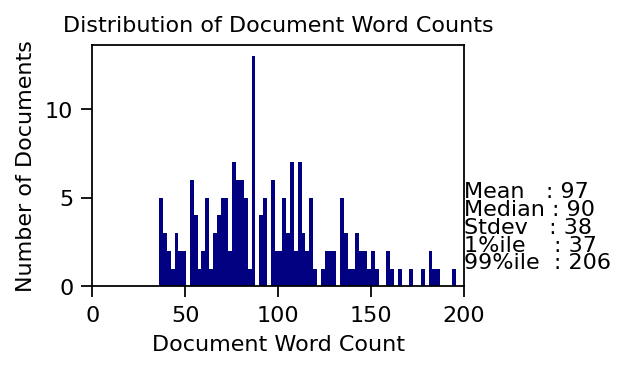

In [15]:
import matplotlib.pyplot as plt
import numpy as np

doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(3,2), dpi=160)
plt.hist(doc_lens, bins = 100, color='navy')
plt.text(200, 5, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(200, 4, "Median : " + str(round(np.median(doc_lens))))
plt.text(200,  3, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(200,  2, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(200,  1, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 200), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=5)
plt.xticks(np.linspace(0,200,5))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=10))
plt.show()

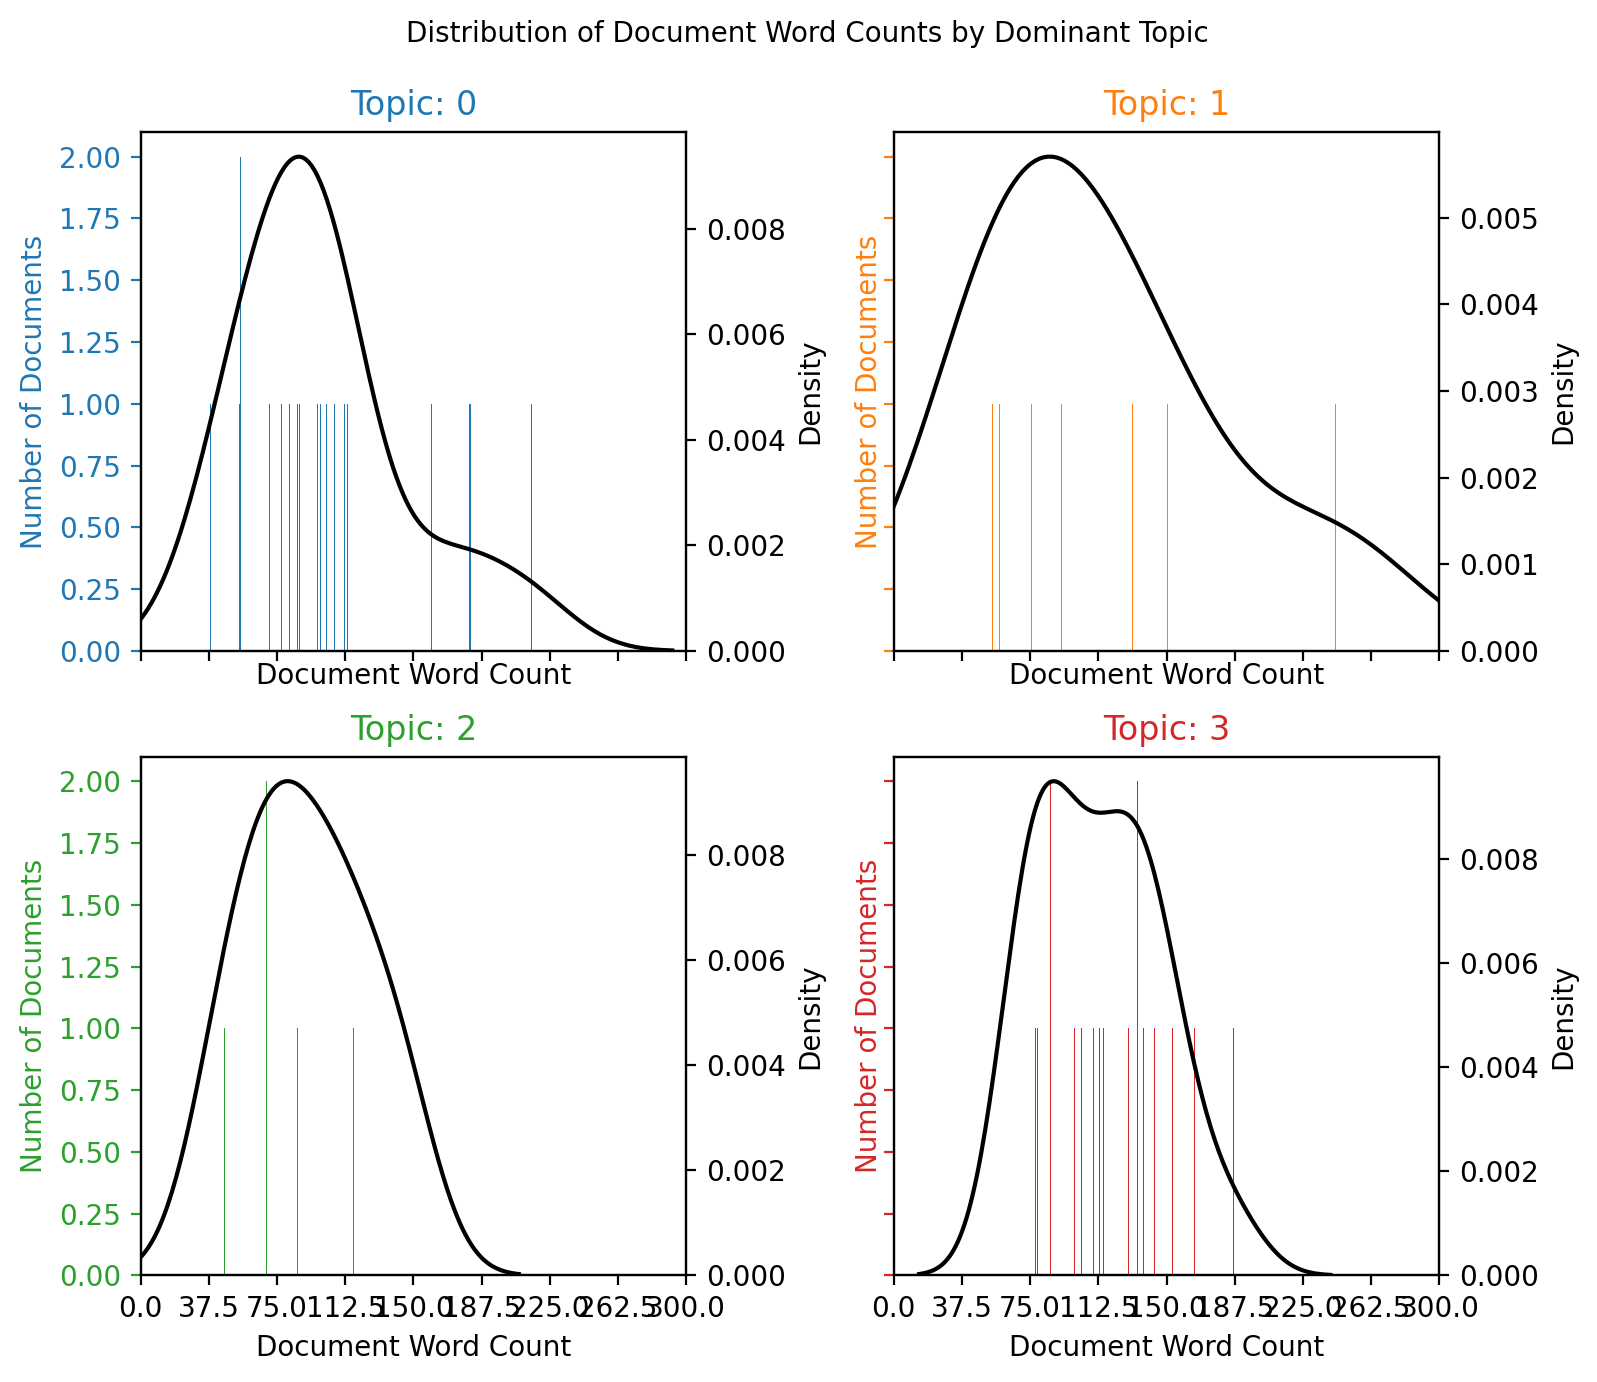

In [16]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(8,7), dpi=200, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 300, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 300), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=12, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,300,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=10)
plt.show()

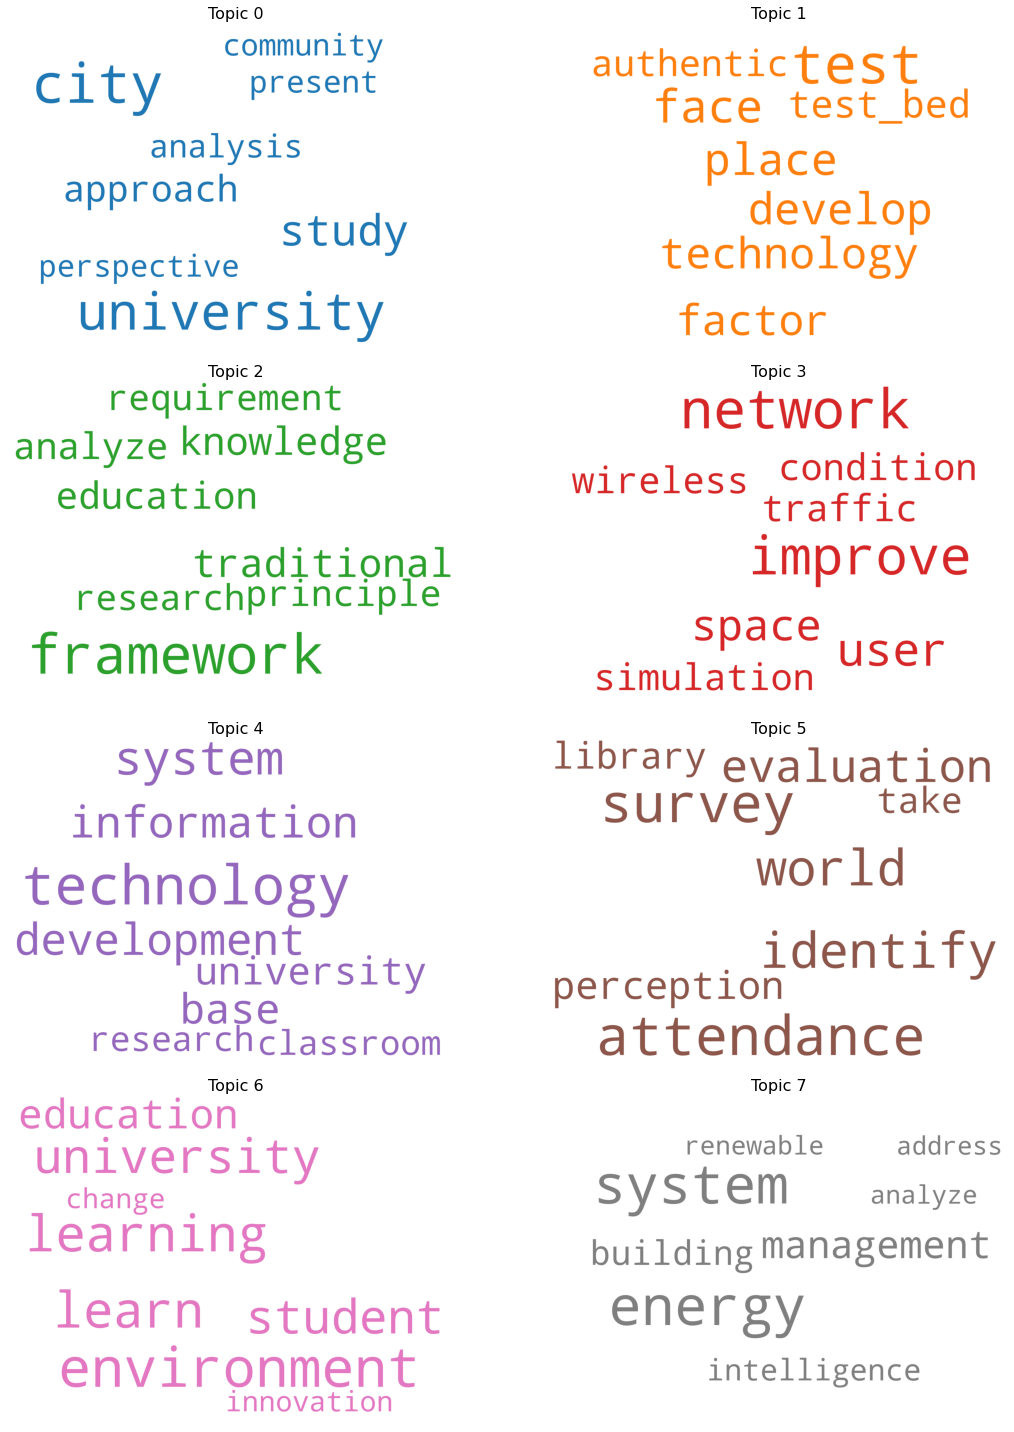

In [17]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
# 2. max_words 10
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=8,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=1)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

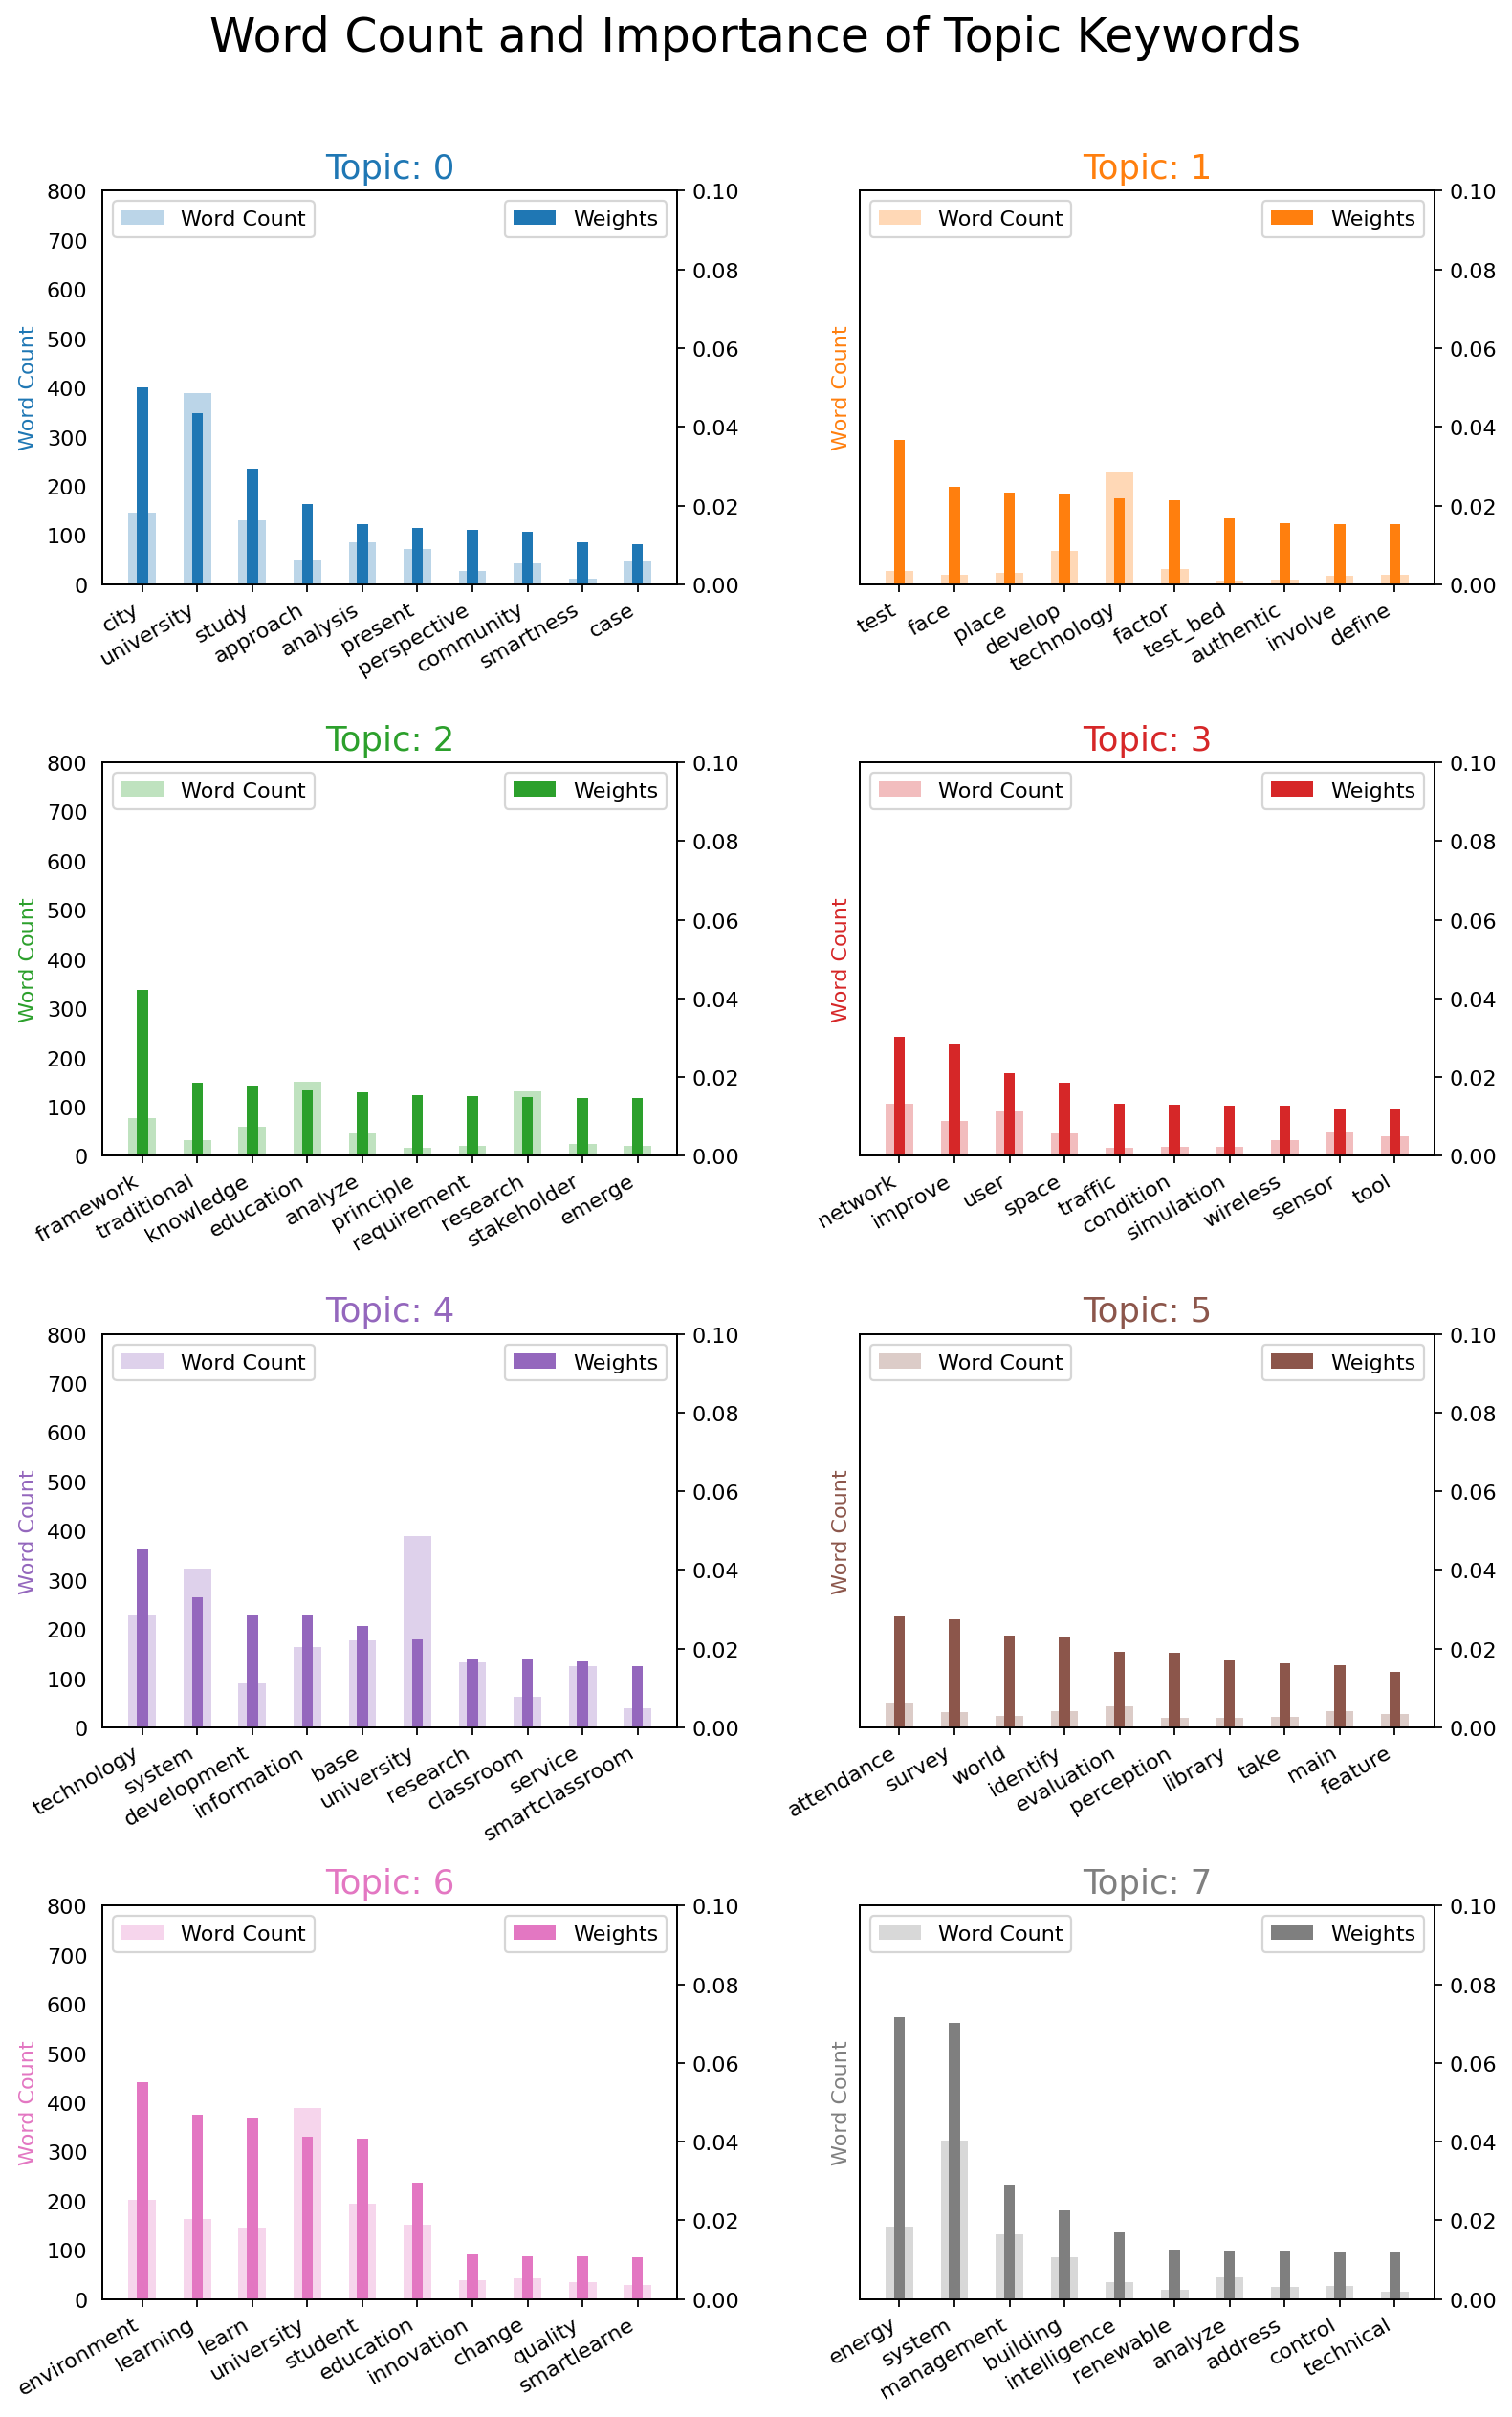

In [18]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(4, 2, figsize=(10,15), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.1); ax.set_ylim(0, 800)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

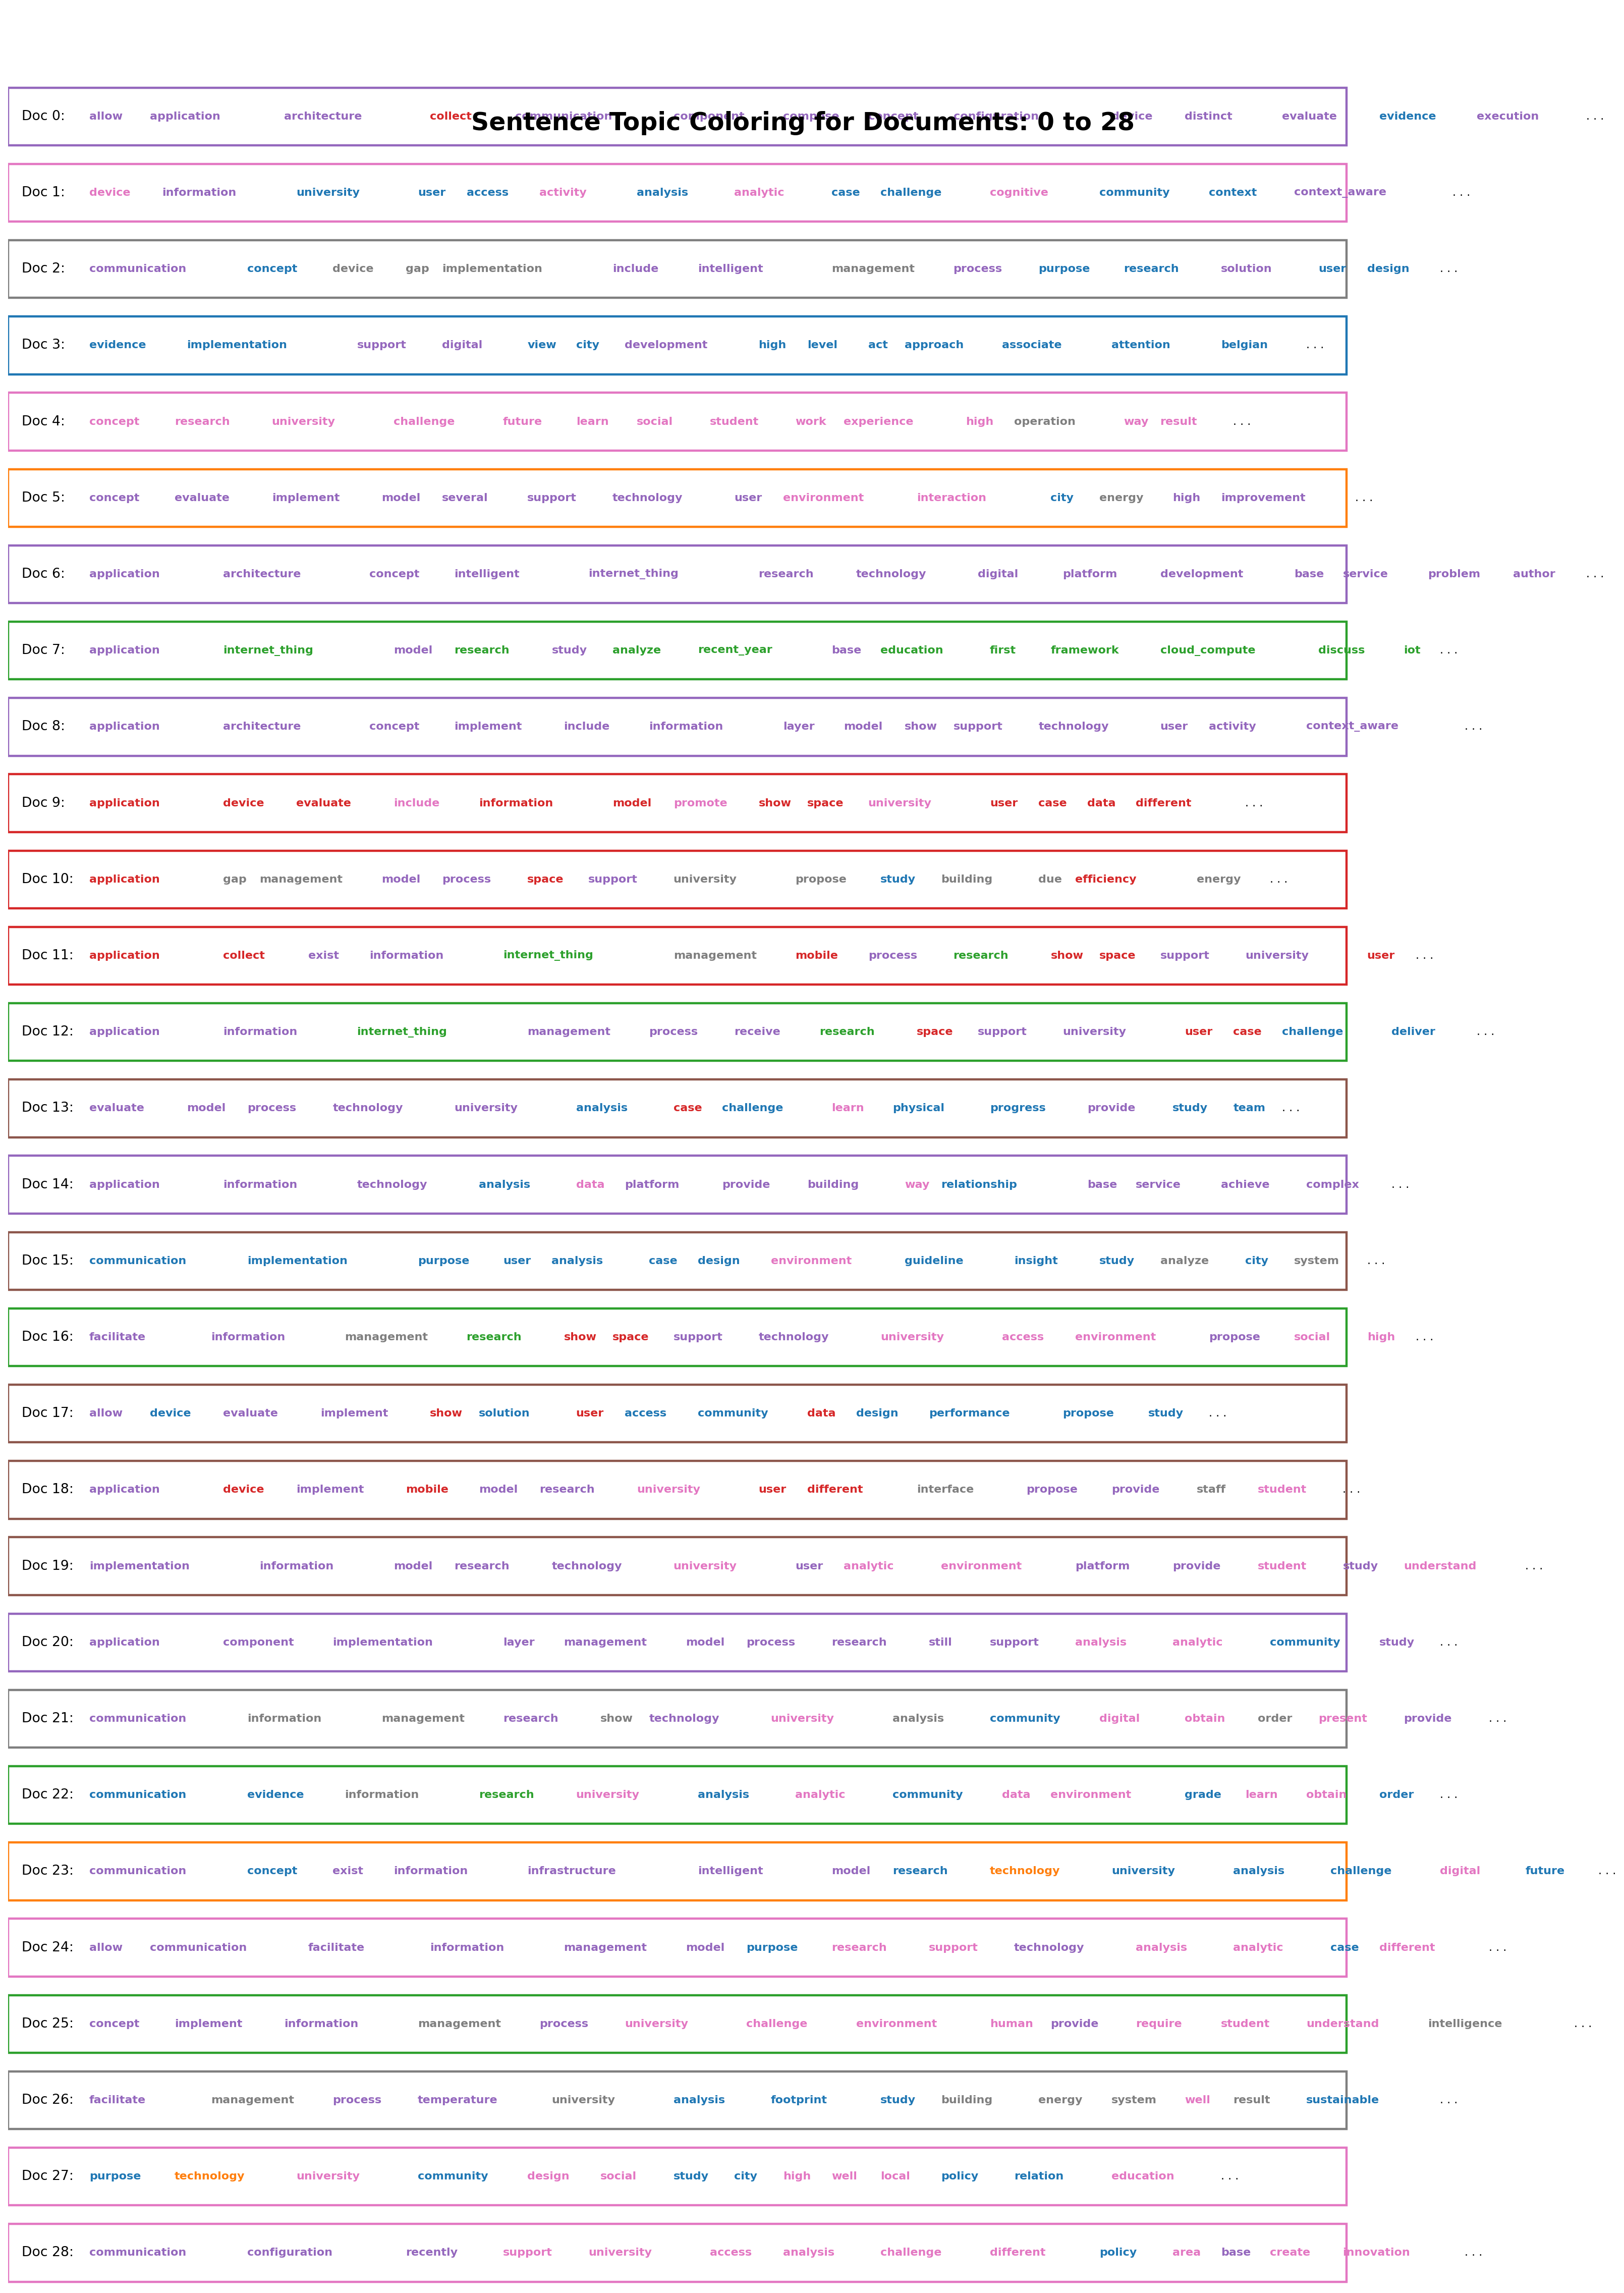

In [19]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 30):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=12, color='black', transform=ax.transAxes, fontweight=500)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=10, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=10, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

In [20]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top5words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 5]

df_top5words_stacked = pd.DataFrame(topic_top5words, columns=['topic_id', 'words'])
df_top5words = df_top5words_stacked.groupby('topic_id').agg(', \n'.join)
df_top5words.reset_index(level=0,inplace=True)

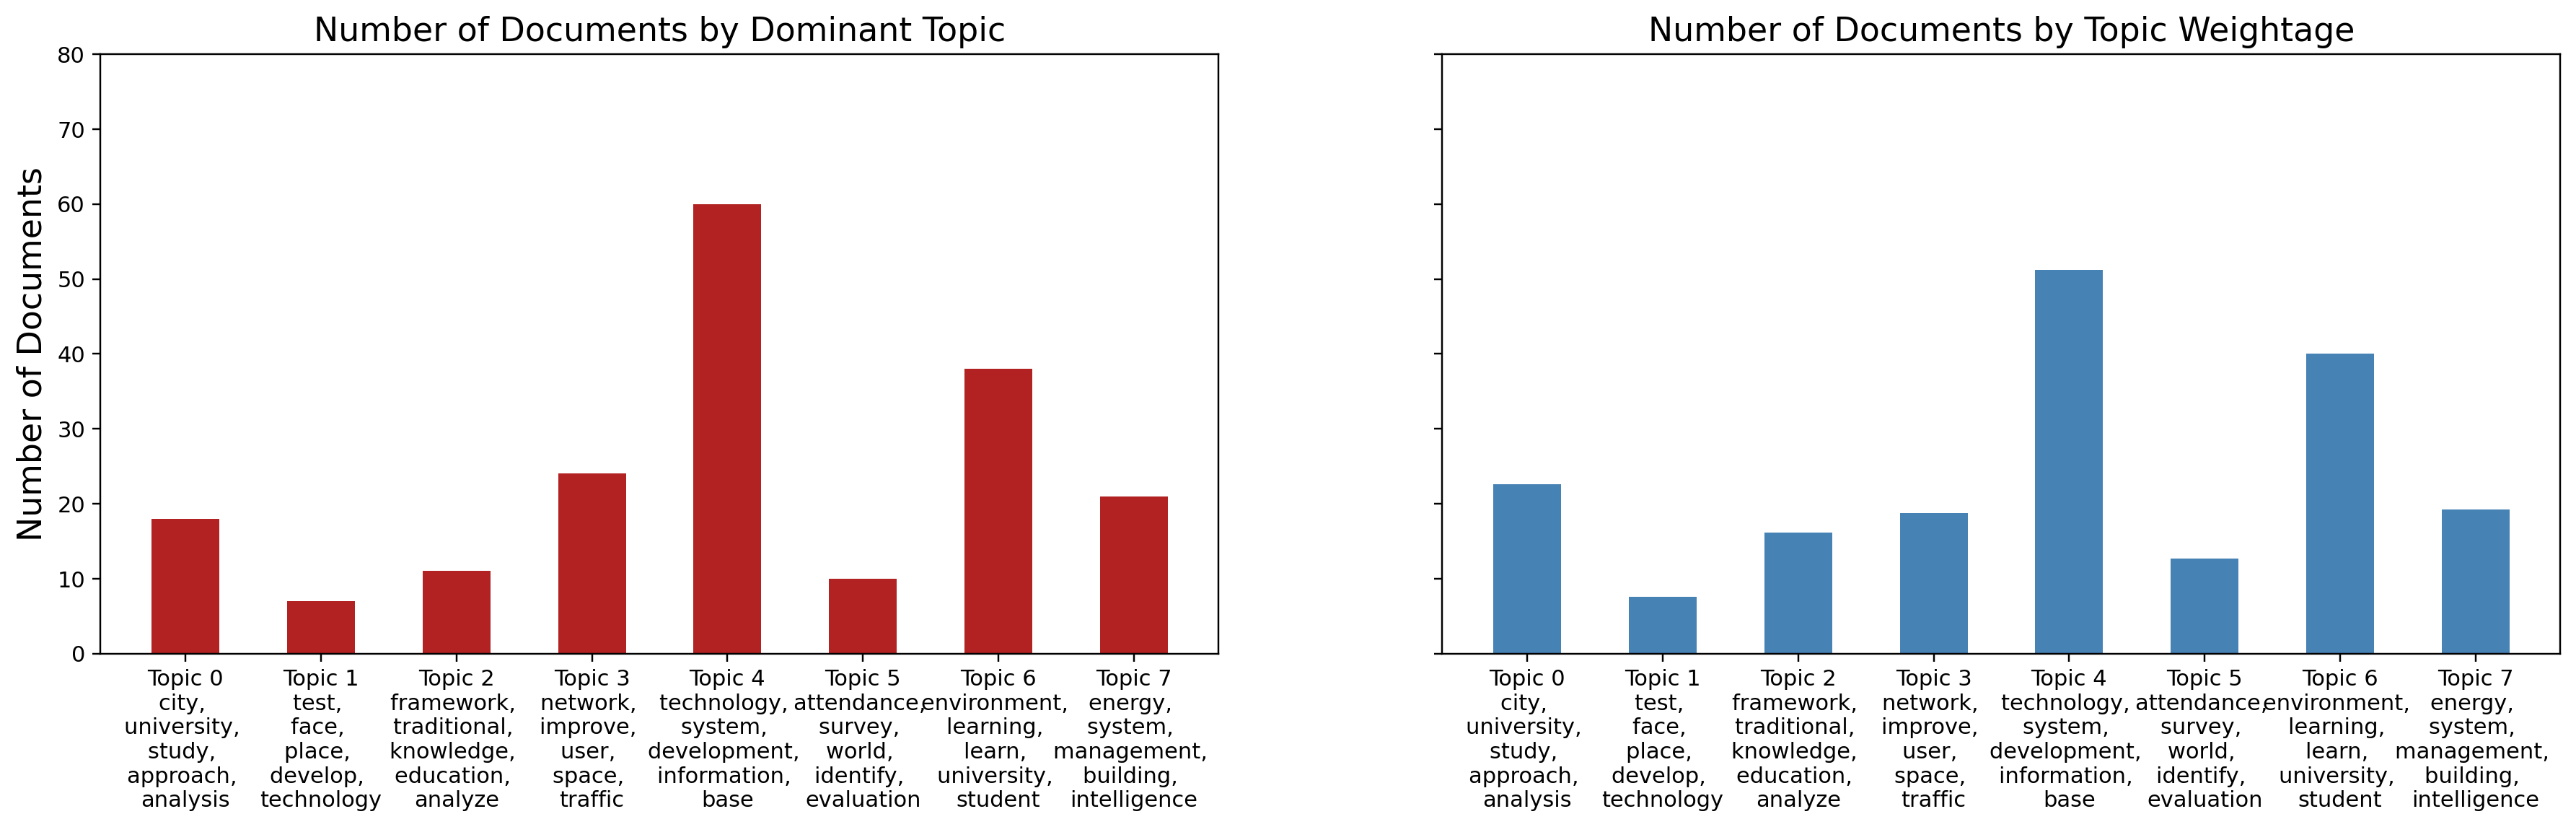

In [21]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), dpi=220, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=0.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top5words.loc[df_top5words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=15))
ax1.set_ylabel('Number of Documents',fontdict=dict(size=15))
ax1.set_ylim(0, 80)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=15))
plt.show()

In [22]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.169316 -0.218915       1        1  24.673679
6      0.190317  0.239496       2        1  21.752679
0      0.154814  0.108596       3        1  11.998391
3     -0.097830 -0.056431       4        1  11.142552
7      0.046245 -0.201328       5        1  11.014493
2     -0.141170  0.020235       6        1   8.065018
5     -0.211015  0.066660       7        1   7.196439
1     -0.110678  0.041688       8        1   4.156749, topic_info=            Term        Freq       Total Category  logprob  loglift
162       system  293.000000  293.000000  Default  30.0000  30.0000
75   environment  222.000000  222.000000  Default  29.0000  29.0000
138       energy  146.000000  146.000000  Default  28.0000  28.0000
52    technology  224.000000  224.000000  Default  27.0000  27.0000
224     learning  188.000000  188.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
52    technology   16.719501  224.563190   Topic8  -3.8249   0.5829
840      advance    5.142801   10.605029   Topic8  -5.0039   2.4567
240       aspect    5.401584   14.225444   Topic8  -4.9548   2.2121
465          aim    5.902726   26.929710   Topic8  -4.8660   1.6626
252    framework    5.455716   71.678130   Topic8  -4.9448   0.6049

[371 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
382       2  0.155019  academic
382       5  0.193773  academic
382       6  0.620074  academic
239       1  0.955534   achieve
58        1  0.187014  activity
...     ...       ...       ...
165       3  0.142525      well
165       4  0.160341      well
380       4  0.969174  wireless
666       7  0.979848     world
836       3  0.930786      year

[435 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 1, 4, 8, 3, 6, 2])